In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [17]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("../data/fcc-forum-pageviews.csv", index_col="date", parse_dates=True)
df.head()


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [18]:
# Clean data
top_value = df['value'].quantile(0.975)
bottom_value = df['value'].quantile(0.025)
df = df[(df['value'] > bottom_value) & (df['value'] < top_value)]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


Text(0, 0.5, 'Page Views')

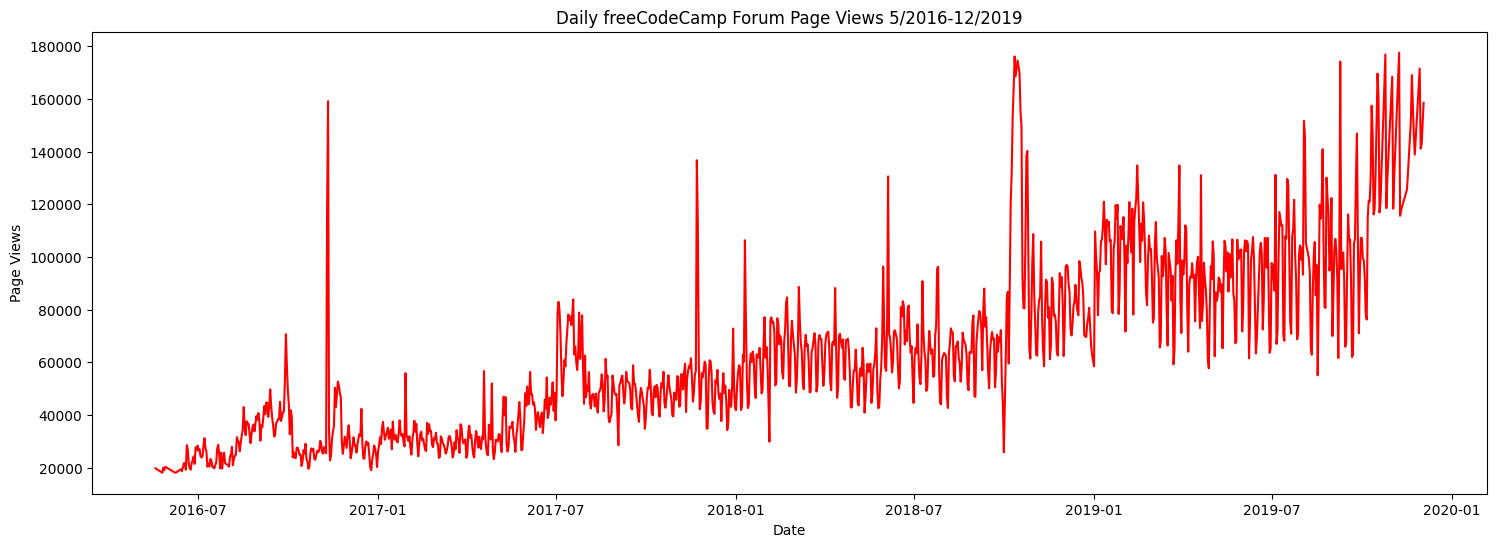

In [26]:
fig, axes = plt.subplots(figsize=(18,6))
axes.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
axes.plot(df.index, df['value'], color="red")
axes.set_xlabel("Date")
axes.set_ylabel("Page Views")

In [121]:
df['month'] = df.index.month_name()
df['year'] = df.index.year
df.head()

,value,month,year
date,,,
2016-05-19,19736,May,2016
2016-05-26,18060,May,2016
2016-05-27,19997,May,2016
2016-05-28,19044,May,2016
2016-05-29,20325,May,2016


In [128]:
df_bar = df.groupby(['year', 'month'])['value'].mean().unstack()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_bar = df_bar.reindex(month_order, axis="columns")
df_bar

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


<Axes: xlabel='Years', ylabel='Average Page View'>

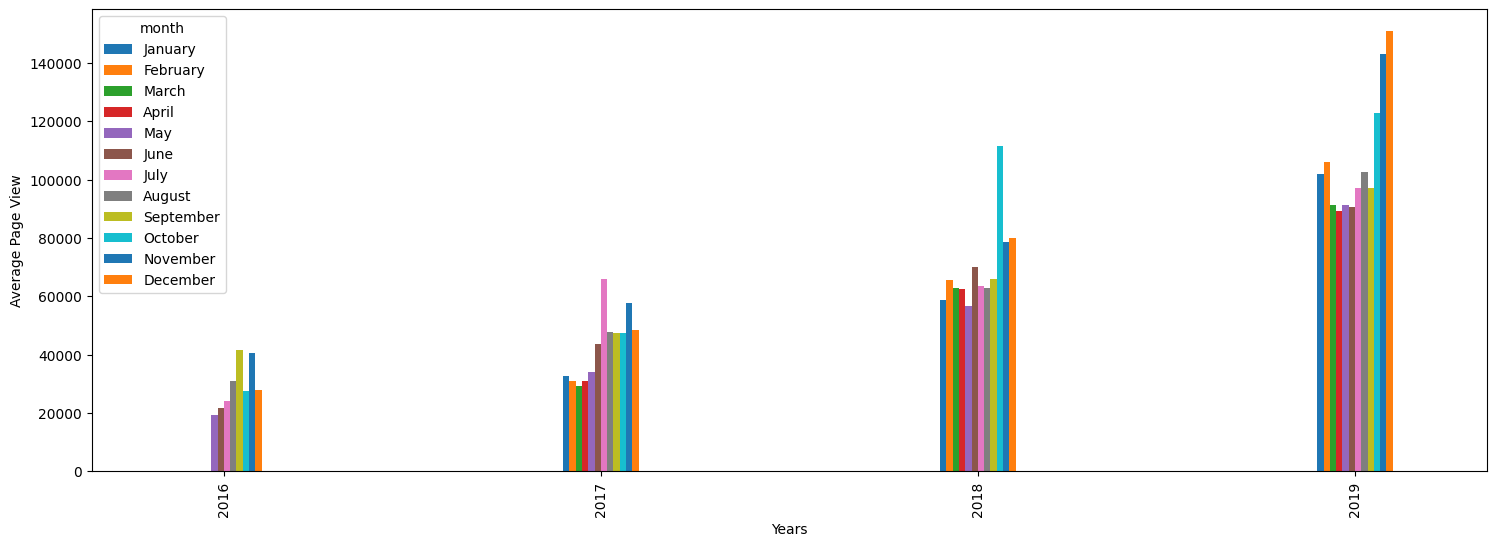

In [132]:
df_bar.plot.bar(figsize=(18,6), width=0.2, legend = True, ylabel='Average Page View', xlabel='Years')

In [134]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016


In [155]:
df_box['month_number'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_number')

df_box.head()

,date,value,month,year,month_number
210,2017-01-06,37353,Jan,2017,1
593,2018-01-24,61700,Jan,2018,1
592,2018-01-23,62758,Jan,2018,1
572,2018-01-03,56013,Jan,2018,1
573,2018-01-04,58910,Jan,2018,1


Text(0.5, 0, 'Month')

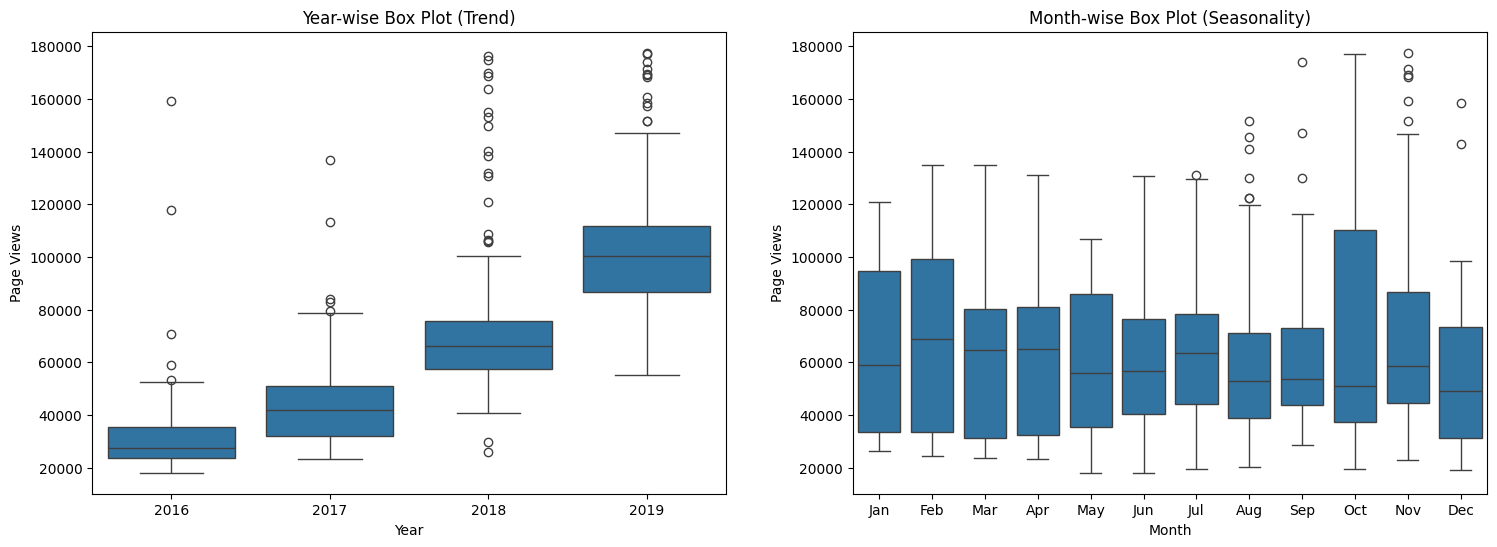

In [164]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0])
axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axes[1])

axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_ylabel("Page Views")
axes[0].set_xlabel("Year")

axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_ylabel("Page Views")
axes[1].set_xlabel("Month")
